# Regrassão Linear - Parte 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimpleLinearRegression():
    def __init__(self):
        pass
    def fit(self, X, y):
        y_bar = np.mean(y)
        x_bar = np.mean(X)
        
        x_x_bar = X - x_bar
        y_y_bar = y - y_bar
        
        num = np.sum(x_x_bar * y_y_bar)
        
        x_x_bar_2 = x_x_bar * x_x_bar
        
        denom = np.sum(x_x_bar_2)
        
        self.b1 = num / denom
        
        self.b0 = y_bar - self.b1 * x_bar
        
    def predict(self, X):
        return self.b0 + X * self.b1
    

In [3]:
class MultipleLinearRegression():
    def __init__(self):
        pass
    def fit(self, X, y):
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]
        
        #'@' é multiplicação matricial
        self.b = np.linalg.pinv(X_.T @ X_) @ X_.T @ y    
        
    def predict(self, X):
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]
        
        return X_ @ self.b

In [4]:
def RSS(y_true, y_pred):
    e = y_true - y_pred
    return np.sum(e*e)

def TSS(y_true, y_mean):
    r = y_true - y_mean
    return np.sum(r*r)

def R2(y_true, y_predict):
    y_mean = np.mean(y_true)
    
    var_sum_rss = RSS(y_true, y_predict)
    var_sum_tss = TSS(y_true, y_mean)
    
    r2 = 1 - (var_sum_rss/var_sum_tss)
    return r2

In [5]:
def MSE(y_true, y_pred):
    e = y_true - y_pred
    return np.mean(e*e)

#### 1. Carregue o conjunto de dados Boston House Price Dataset. 

In [6]:
dados = np.loadtxt("housing.data")

In [7]:
dados

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

#### 2. Vamos analisar apenas a variável LSTAT como atributo preditor e a variável MEDV como atributo alvo.

In [8]:
LSTAT = dados[:, -2]

In [9]:
LSTAT

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

In [10]:
MEDV = dados[:, -1]

In [11]:
MEDV

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

#### 3. Embaralhe as amostras com seus valores alvo. Divida o conjunto de dados em 80% para treino e 20% para teste.

In [12]:
# 506 instâncias no total
# 80% treino = 405 instâncias
# 20% teste = 101 instâncias

#embaralhando as amostras
np.random.seed(0)
np.random.shuffle(dados)

#dividindo o conjunto
X_train = dados[:405, -2]
y_train = dados[:405, -1]

X_test = dados[405:, -2]
y_test = dados[405:, -1]

#### 4. Aplique a regressão linear

In [13]:
rl = SimpleLinearRegression()
rl.fit(X_train, y_train)

#predizendo os valores para o conjunto de treino
y_pred_train = rl.predict(X_train)

#predizendo os valores para o conjunto de teste
y_pred_test = rl.predict(X_test)

    a. Reporte MSE e R2 score para o conjunto de treino e para o conjunto de teste

In [14]:
#Para o conjunto de treino
print("MSE: ", MSE(y_train, y_pred_train))
print("R2: ", R2(y_train, y_pred_train))

MSE:  37.5050706603648
R2:  0.5294170966423808


In [15]:
#Para o conjunto de teste
print("MSE: ", MSE(y_test, y_pred_test))
print("R2: ", R2(y_test, y_pred_test))

MSE:  42.70214669338835
R2:  0.5865568789800081


    b. Plote um gráfico com LSTAT no eixo X e MEDV no eixo Y onde apresenta os dados originais (conjunto inteiro) como pontos e, também, apresenta a reta da regressão linear

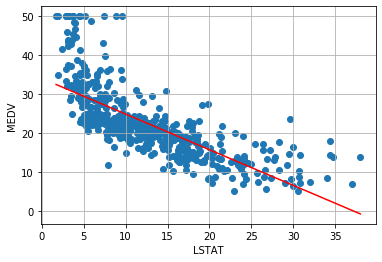

In [16]:
y_pred = rl.predict(LSTAT)

plt.grid()

# Apresentando os dados originais como pontos
plt.scatter(LSTAT, MEDV)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

# Desenhando a reta da regressão linear
plt.plot([LSTAT[np.argmin(LSTAT)], LSTAT[np.argmax(LSTAT)]], [y_pred[np.argmin(LSTAT)], y_pred[np.argmax(LSTAT)]] , color='r')
plt.show()

    c. Plote também um gráfico onde os valores preditos para o conjunto de treino estão no eixo X e os valores alvo originais estão no eixo Y. Trace também a reta Y=X. Ideia: pontos próximos da reta Y=X indicam que a predição foi acurada.

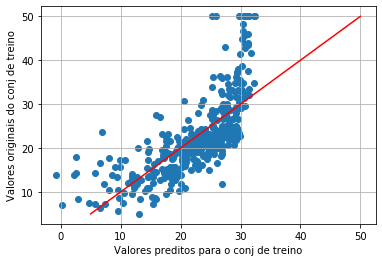

In [17]:
plt.grid()

# Apresentanto os dados como pontos
plt.scatter(y_pred_train, y_train)
plt.xlabel("Valores preditos para o conj de treino")
plt.ylabel("Valores originais do conj de treino")

# Traçando a reta da regressão linear
plt.plot([np.min(y_train), np.max(y_train)],[np.min(y_train), np.max(y_train)], color='r')
plt.show()

    d. Adicione o termo LSTAT² ao conjunto de dados faça a mesma análise dos itens a,b,c.

In [18]:
LSTAT2 = LSTAT*LSTAT

# Concatenando as colunas
LSTAT_2 = np.c_[LSTAT, LSTAT2]

X_train_2 = np.c_[X_train, X_train*X_train]
X_test_2 = np.c_[X_test, X_test*X_test]

#aplicando a regressão linear
rlm = MultipleLinearRegression()
rlm.fit(X_train_2, y_train)

#predizendo os valores para o conjunto de treino
y_pred_train_2 = rlm.predict(X_train_2)

#predizendo os valores para o conjunto de teste
y_pred_test_2 = rlm.predict(X_test_2)

In [19]:
# MSE e R2 score para o conjunto de treino
print("MSE: ", MSE(y_train, y_pred_train_2))
print("R2: ", R2(y_train, y_pred_train_2))

MSE:  29.063722413911517
R2:  0.6353322194811359


In [20]:
# MSE e R2 score para o conjunto de teste
print("MSE: ", MSE(y_test, y_pred_test_2))
print("R2: ", R2(y_test, y_pred_test_2))

MSE:  35.511497733652
R2:  0.6561768999456721


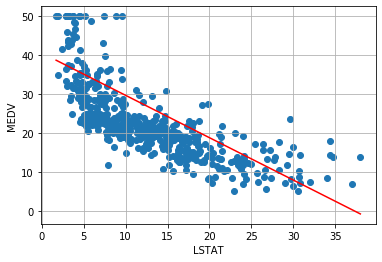

In [21]:
# Plote um gráfico com LSTAT no eixo X e MEDV no eixo Y
y_pred_2 = rlm.predict(LSTAT_2)

plt.grid()
plt.scatter(LSTAT, MEDV)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.plot([LSTAT[np.argmin(LSTAT)], LSTAT[np.argmax(LSTAT)]], [y_pred_2[np.argmin(LSTAT)], y_pred[np.argmax(LSTAT)]] , color='r')
plt.show()

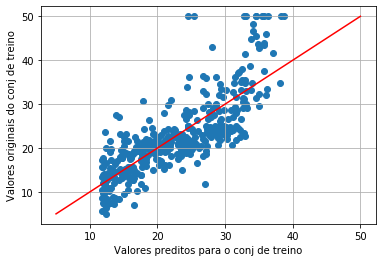

In [22]:
# Plote também um gráfico onde os valores preditos para o conjunto de treino estão no eixo 
# X e os valores alvo originais estão no eixo Y.

plt.grid()
plt.scatter(y_pred_train_2, y_train)
plt.xlabel("Valores preditos para o conj de treino")
plt.ylabel("Valores originais do conj de treino")


plt.plot([np.min(y_train), np.max(y_train)],[np.min(y_train), np.max(y_train)], color='r')
plt.show()

    e. Adicione a o termo LSTAT³ ao conjunto de dados faça a mesma análise dos itens a,b,c.

In [23]:
LSTAT3 = LSTAT*LSTAT*LSTAT

LSTAT_3 = np.c_[LSTAT, LSTAT3]

X_train_3 = np.c_[X_train, X_train*X_train*X_train]
X_test_3 = np.c_[X_test, X_test*X_test*X_test]

#aplicando a regressão linear
rlm = MultipleLinearRegression()
rlm.fit(X_train_3, y_train)

#predizendo os valores para o conjunto de treino
y_pred_train_3 = rlm.predict(X_train_3)

#predizendo os valores para o conjunto de teste
y_pred_test_3 = rlm.predict(X_test_3)

In [24]:
# MSE e R2 score para o conjunto de treino
print("MSE: ", MSE(y_train, y_pred_train_3))
print("R2: ", R2(y_train, y_pred_train_3))

MSE:  30.52408084954759
R2:  0.6170088381227143


In [25]:
# MSE e R2 score para o conjunto de teste
print("MSE: ", MSE(y_test, y_pred_test_3))
print("R2: ", R2(y_test, y_pred_test_3))

MSE:  36.481435035129316
R2:  0.6467859457157625


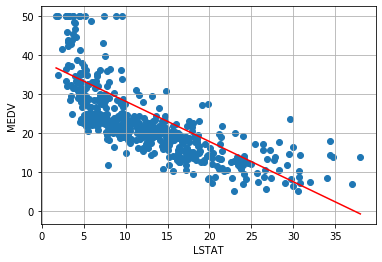

In [26]:
# Plote um gráfico com LSTAT no eixo X e MEDV no eixo Y
y_pred_3 = rlm.predict(LSTAT_3)

plt.grid()
plt.scatter(LSTAT, MEDV)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.plot([LSTAT[np.argmin(LSTAT)], LSTAT[np.argmax(LSTAT)]], [y_pred_3[np.argmin(LSTAT)], y_pred[np.argmax(LSTAT)]] , color='r')
plt.show()

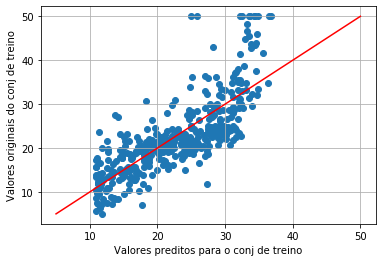

In [27]:
# Plote também um gráfico onde os valores preditos para o conjunto de treino estão no eixo 
# X e os valores alvo originais estão no eixo Y.

plt.grid()
plt.scatter(y_pred_train_3, y_train)
plt.xlabel("Valores preditos para o conj de treino")
plt.ylabel("Valores originais do conj de treino")

plt.plot([np.min(y_train), np.max(y_train)],[np.min(y_train), np.max(y_train)], color='r')
plt.show()